In [223]:
import math
import numpy as np
import scipy.special as sp
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from numba import jit,int64,float64
import time
import scipy.optimize as sciopt
%matplotlib inline

#To increase cell width:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [224]:
#Plot template

# fig,ax = plt.subplots(1,1)
# ax.scatter(alphas_arr,stabilities_arr[:,0],c=CB_color_cycle[0],marker=">",label="fate 1")
# ax.scatter(alphas_arr,stabilities_arr[:,1],c=CB_color_cycle[1],marker="<",label="fate 2",alpha=1)
# ax.axhline(y=stability_thresh,c="k",ls="--",label="threshold")
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.tick_params(axis='both', which='minor', labelsize=10)
# ax.set_xlabel(r"Noise coefficient $\alpha$",fontsize=18)
# ax.set_ylabel(r"Mean stability factor",fontsize=18)
# ax.legend(loc="best",fontsize=12)
# ax.set_title(f"Stability vs. noise",fontsize=20)
# fig.savefig("1b_stability_vs_noise.svg",format="svg")

#Color-blind friendly colors to plot:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

In [103]:
#Loading from 'fpm' datafile - these are the expression levels normalized by cell size:
fpm = pd.read_csv('fpm_output.txt',sep=",")

#Loading from 'wgm' datafile - expression levels normalized by mean-variance trend:
wgm = pd.read_csv('wgm_output.txt',sep="\t")

#The 'wgwm' datafile contains the weights of the expression levels used in 'wgm':
wgm_wts = pd.read_csv('wgm_weights_output.txt',sep="\t")

#Cell summary data which contains pseudotime information:
cell_summary = pd.read_csv('cell_summary_pseudotime_info.txt',sep="\t")

#Number of genes:
num_genes = len(wgm.axes[0])

#Number of biocells:
num_biocells = len(cell_summary.axes[0])

In [215]:
#Storing the cell and the psdotime:
cell_psdotimes = cell_summary[['Unnamed: 0','t']].to_numpy()
gene_names = fpm['Unnamed: 0'].to_numpy()

#Storing the gene expression values at each psdotime:
genes_psdotimes = np.zeros((num_genes,num_biocells))
for cell_idx in range(num_biocells):
    genes_psdotimes[:,cell_idx] = fpm[['Unnamed: 0',cell_psdotimes[cell_idx,0]]].to_numpy()[:,1]

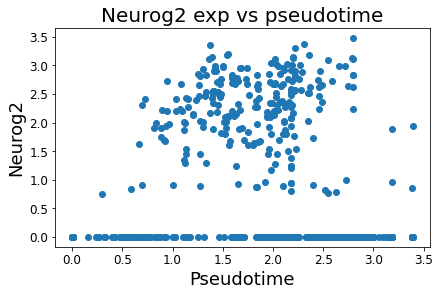

In [241]:
fig,ax = plt.subplots(1,1,constrained_layout=True)
ax.scatter(cell_psdotimes[:,1],genes_psdotimes[np.where(gene_names=='Neurog2')[0][0]])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel("Pseudotime",fontsize=18)
ax.set_ylabel("Neurog2",fontsize=18)
# ax.legend(loc="best",fontsize=12)
ax.set_title(f"Neurog2 exp vs pseudotime",fontsize=20)
fig.savefig("99_neurog2.eps",format="eps")

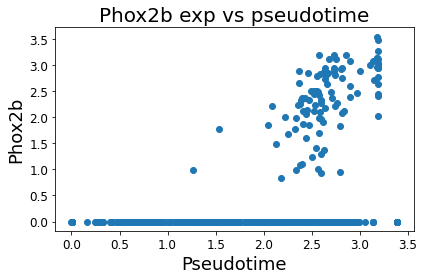

In [239]:
fig,ax = plt.subplots(1,1,tight_layout=True)
ax.scatter(cell_psdotimes[:,1],genes_psdotimes[np.where(gene_names=='Phox2b')[0][0]])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel("Pseudotime",fontsize=18)
ax.set_ylabel("Phox2b",fontsize=18)
# ax.legend(loc="best",fontsize=12)
ax.set_title(f"Phox2b exp vs pseudotime",fontsize=20)
fig.set_tight_layout(tight=True)
fig.savefig("99_phox2b.pdf",format="pdf")